In [1]:
import numpy as np
import pandas as pd
import datetime 
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
linestyle_cycler = cycle(['-','--',':','-.'])
palette = 'gist_stern'
plt.set_cmap(palette)
cmap = plt.get_cmap(palette)

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

<Figure size 432x288 with 0 Axes>

# Electricity demand


In [3]:
file_name = '../data/hourly_20140102_20191101.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000%z') if 'T' in x else pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z')
df = pd.read_csv(file_name, index_col=2, parse_dates=['datetime'], date_parser=dateparse)
df = df['value']/1000
df.index = pd.to_datetime(df.index, utc=True)
df.index = df.index.map(lambda x: pd.to_datetime(x).tz_convert('Europe/Berlin'))
df

datetime
2014-01-02 00:00:00+01:00    24.256
2014-01-02 00:10:00+01:00    24.260
2014-01-02 00:20:00+01:00    23.689
2014-01-02 00:30:00+01:00    23.349
2014-01-02 00:40:00+01:00    22.896
                              ...  
2019-11-01 23:10:00+01:00    24.440
2019-11-01 23:20:00+01:00    24.073
2019-11-01 23:30:00+01:00    23.734
2019-11-01 23:40:00+01:00    23.356
2019-11-01 23:50:00+01:00    23.475
Name: value, Length: 306720, dtype: float64

/home/plara/tensorflow/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


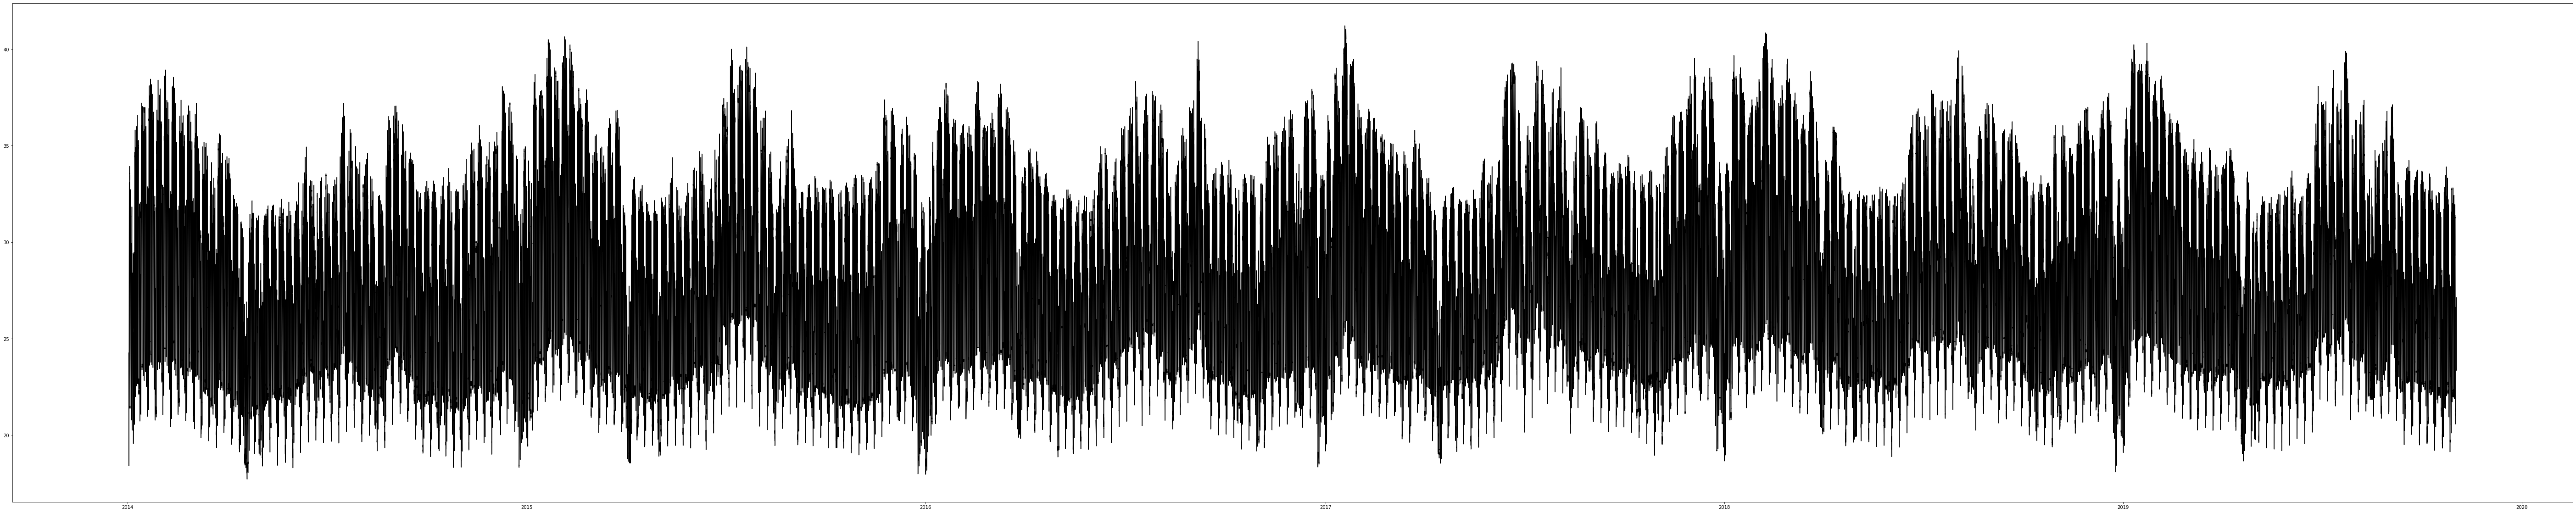

In [4]:
fig, ax = plt.subplots(1,1, figsize=(100,20))
ax.plot(df, color=cmap(0))

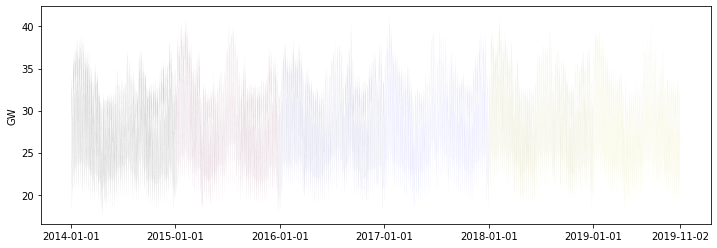

In [5]:
cmap_aux = discrete_cmap(6+1, palette) 
fig, ax = plt.subplots(1,1, figsize=(12,4))
for y in range(2014,2020):
    init_date = datetime.datetime(year=y,month=1,day=1, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=y,month=12,day=31, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    ax.plot(s_aux, alpha=1., label=str(y), color=cmap_aux(y-2014), linewidth=0.01)
ax.set_ylabel('GW')
ax.set_xticks(['2014', '2015', '2016', '2017', '2018', '2019', '2019-11-02'])
fig.savefig('../files/images/ED-entire.eps', format='eps')

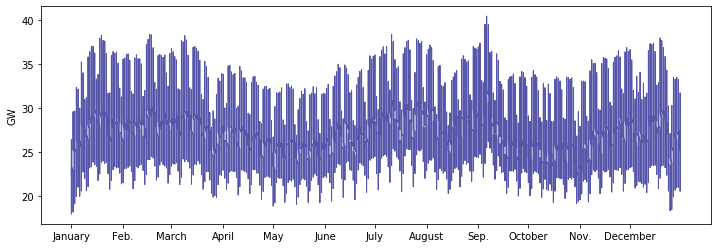

In [6]:
cmap_aux = discrete_cmap(6+1, palette) 
fig, ax = plt.subplots(1,1, figsize=(12,4))
for y in [2016]:
    init_date = datetime.datetime(year=y,month=1,day=1, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=y,month=12,day=31, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    s_aux.index = s_aux.index.map(lambda x : x.strftime('%d %B'))
    ax.plot(s_aux, alpha=1., label=str(y), color=cmap_aux(2), linewidth=1)
ax.set_ylabel('GW')
ax.set_xticks(['01 January', '01 February', '01 March', '01 April', '01 May', '01 June', '01 July', '01 August', '01 September', '01 October', '01 November', '01 December'])
ax.set_xticklabels(['January', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'August', 'Sep.', 'October', 'Nov.', 'December'])
fig.savefig('../files/images/ED-yearly.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


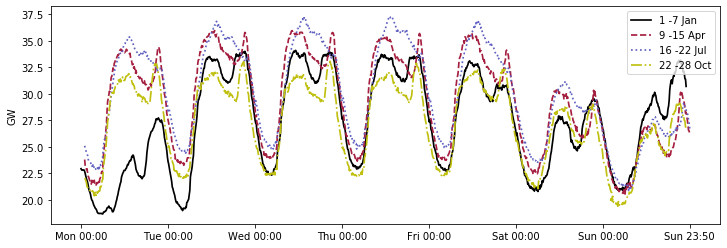

In [7]:
#(y,M,d,h,m)
init_dates= [(2018,1,1,0,0),  (2018,4,2+7,0,0),  (2018,7,2+7*2,0,0),  (2018,10,1+7*3,0,0),]
linestyle_cycler = cycle(['-','--',':','-.'])
cmap_aux = discrete_cmap(4+7, palette)
cmap_aux = [discrete_cmap(4+4, palette)(0), discrete_cmap(4+5, palette)(1), discrete_cmap(4+5, palette)(3),  discrete_cmap(4+5, palette)(6) ]
fig, ax = plt.subplots(1,1, figsize=(12,4))
for i, (y,M,d,h,m) in enumerate(init_dates):
    init_date = datetime.datetime(year=y,month=M,day=d, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=y,month=M,day=d+6, hour=22, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    s_aux.index = s_aux.index.map(lambda x : x.strftime('%a %H:%M'))
    ax.plot(s_aux, alpha=1, label=(init_date.strftime('%-d -') + end_date.strftime('%-d %b')), color=cmap_aux[i],linewidth=1.7, linestyle=next(linestyle_cycler))
    ax.xaxis.set_major_locator(ticker.MultipleLocator((len(s_aux)+1)/7))
ax.set_ylabel('GW')
ax.set_xticks(['Mon 00:00', 'Tue 00:00', 'Wed 00:00', 'Thu 00:00', 'Fri 00:00','Sat 00:00', 'Sun 00:00', 'Sun 23:50'])
ax.legend()
fig.savefig('../files/images/ED-weekly.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


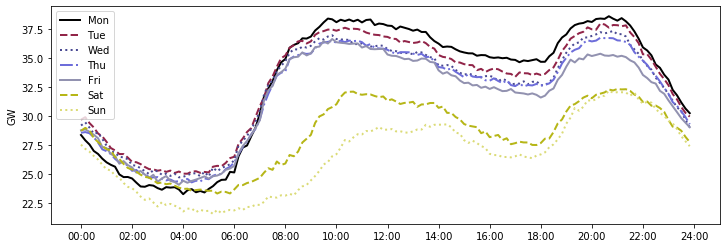

In [8]:
cmap_aux = discrete_cmap(7+1, palette)
linestyle_cycler = cycle(['-','--',':','-.'])
fig, ax = plt.subplots(1,1, figsize=(12,4))
for i in range(7):
    init_date = datetime.datetime(year=2019,month=2,day=i+4, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=2019,month=2,day=i+4, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    s_aux.index = s_aux.index.map(lambda x : x.strftime('%H:%M'))
    ax.plot(s_aux, alpha=1, label=(init_date.strftime('%a')), linestyle=next(linestyle_cycler), color=cmap_aux(i), linewidth=2)    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(len(s_aux)/12))
ax.set_xticks(['00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00',
              '18:00','20:00','22:00','24:00'])
ax.set_ylabel('GW')
ax.legend()
fig.savefig('../files/images/ED-daily_4-2-2019_11-2-2019.eps', format='eps')


# Electric vehicles

In [9]:
file_name = '../data/CECOVEL.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M')
df = pd.read_csv(file_name, index_col=1, parse_dates=['timestamp'], date_parser=dateparse)
init_date = datetime.datetime(year=2015,month=3,day=2, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
end_date = datetime.datetime(year=2016,month=5,day=31, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
df = df['value'].loc[init_date:end_date]
df

timestamp
2015-03-02 00:00:00     0.001
2015-03-02 01:00:00    32.565
2015-03-02 02:00:00    38.347
2015-03-02 03:00:00    26.616
2015-03-02 04:00:00    17.202
                        ...  
2016-05-31 19:00:00    27.906
2016-05-31 20:00:00    13.047
2016-05-31 21:00:00    15.868
2016-05-31 22:00:00    18.584
2016-05-31 23:00:00    24.760
Name: value, Length: 10966, dtype: float64

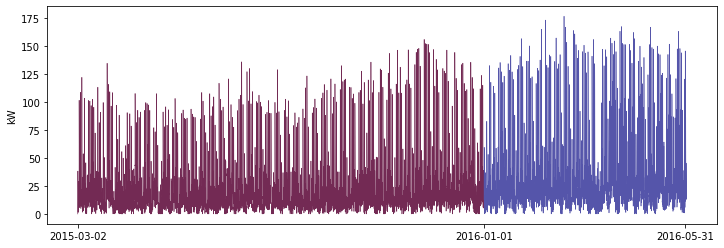

In [10]:
cmap_aux = discrete_cmap(6+1, palette) 
fig, ax = plt.subplots(1,1, figsize=(12,4))
for y in range(2015,2017):
    init_date = datetime.datetime(year=y,month=1,day=1, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=y,month=12,day=31, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    ax.plot(s_aux, alpha=1., label=str(y), color=cmap_aux(y-2014), linewidth=0.6)
ax.set_ylabel('kW')
ax.set_xticks([ '2015-03-02', '2016', '2016-05-31'])
fig.savefig('../files/images/EV-entire.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


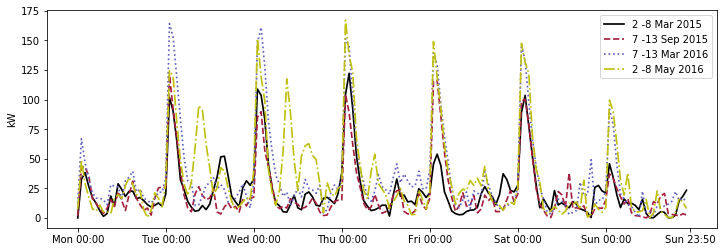

In [11]:
#(y,M,d,h,m)
init_dates= [(2015,3,2,0,0), (2015,9,7,0,0), (2016,3,7,0,0), (2016,5,2,0,0)]
linestyle_cycler = cycle(['-','--',':','-.'])
cmap_aux = discrete_cmap(4+7, palette)
cmap_aux = [discrete_cmap(4+4, palette)(0), discrete_cmap(4+5, palette)(1), discrete_cmap(4+5, palette)(3),  discrete_cmap(4+5, palette)(6) ]
fig, ax = plt.subplots(1,1, figsize=(12,4))
for i, (y,M,d,h,m) in enumerate(init_dates):
    init_date = datetime.datetime(year=y,month=M,day=d, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=y,month=M,day=d+6, hour=22, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    s_aux.index = s_aux.index.map(lambda x : x.strftime('%a %H:%M'))
    ax.plot(s_aux, alpha=1, label=(init_date.strftime('%-d -') + end_date.strftime('%-d %b %Y')), color=cmap_aux[i],linewidth=1.7, linestyle=next(linestyle_cycler))
    ax.xaxis.set_major_locator(ticker.MultipleLocator((len(s_aux)+1)/7))
ax.set_ylabel('kW')
ax.set_xticks(['Mon 00:00', 'Tue 00:00', 'Wed 00:00', 'Thu 00:00', 'Fri 00:00','Sat 00:00', 'Sun 00:00', 'Sun 23:50'])
ax.legend()
fig.savefig('../files/images/EV-weekly.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


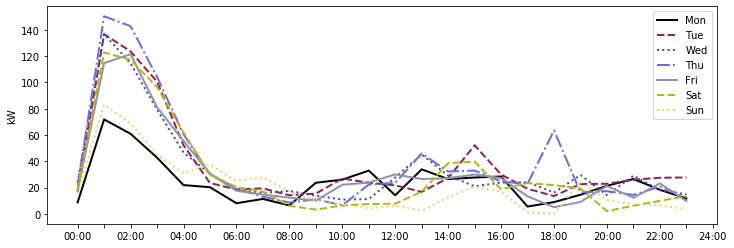

In [12]:
cmap_aux = discrete_cmap(7+1, palette)
linestyle_cycler = cycle(['-','--',':','-.'])
fig, ax = plt.subplots(1,1, figsize=(12,4))
for i in range(7):
    init_date = datetime.datetime(year=2016,month=2,day=i+1, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
    end_date = datetime.datetime(year=2016,month=2,day=i+1, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
    s_aux = df.loc[init_date:end_date]
    s_aux.index = s_aux.index.map(lambda x : x.strftime('%H:%M'))
    ax.plot(s_aux, alpha=1, label=(init_date.strftime('%a')), linestyle=next(linestyle_cycler), color=cmap_aux(i), linewidth=2)    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(len(s_aux)/12))

ax.set_xticks(['0{}:00'.format(str(h)) if h<10 else  '{}:00'.format(str(h)) for h in range(25)])
ax.set_xticklabels([('0{}:00'.format(str(h)) if h<10 else '{}:00'.format(str(h))) if h%2==0 else '' for h in range(25)])
ax.set_ylabel('kW')
ax.legend()
fig.savefig('../files/images/EV-daily_1-2-2016_7-2-2016.eps', format='eps')

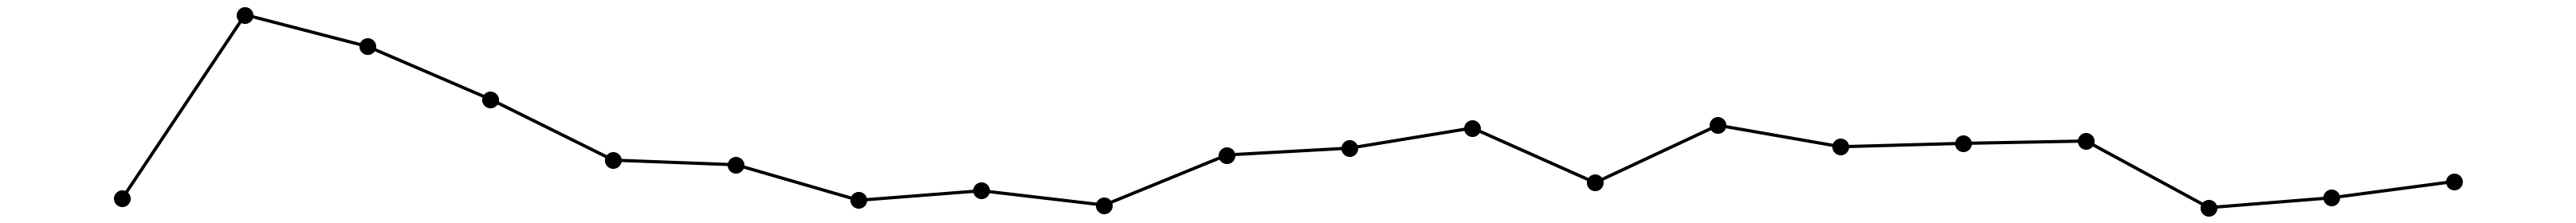

In [13]:
fig, ax = plt.subplots(1,1, figsize=(45,4))
init_date = datetime.datetime(year=2016,month=2,day=1, hour=0, minute=0 ,tzinfo=df.index[0].tzinfo)
end_date = datetime.datetime(year=2016,month=2,day=1, hour=23, minute=59 ,tzinfo=df.index[0].tzinfo)
s_aux = df.loc[init_date:end_date].values
ax.plot(s_aux[:20], 'ko-', linewidth=4, markersize=20)
ax.axis('off')
fig.tight_layout()